In [1]:
import pandas as pd
from pyspec.plot.plot_mass_spectrum import plot_head_to_tail_mass_spectra

from lcb.cisvis.identify import identify_compound
%matplotlib inline
from cisclient.client import CISClient
from lcb.cisvis.spectra import generate_similarity_plot, generate_spectra_plot, to_dataframe, generate_histogram_intensity, \
    generate_histogram_accurate_mass, generate_histogram_ri, generate_similarity_histogram, generate_head_tail_plot

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]


In [2]:
# these are parameterized over papermill
cis_url = 'https://dev-api.metabolomics.us/cis'
cis_api_token = 'rDJfRW6ilG2WooOR72AaE3NqL4m23WvY6ub4FEoS'
#splash = 'splash10-03di-0092000000-8002a9e8f0dce97df334'        #CUDA
#splash = 'splash10-0ufr-1293050000-5c9fbdf0eed547cc98b0'        # SHOULD NOT HAVE BEEN COMBINED
splash = 'splash10-004i-0123009000-87eb87c70052f9996f5a'        # borderline
#splash = 'splash10-0006-0090000000-f91c07f563eb1503c3a6'
#splash = 'splash10-00di-0090000000-56710ea0961bc0f19024'
library = 'soqe[M-H] | QExactive | test | negative'

In [3]:

client =  CISClient(cis_url, cis_api_token)
compound = client.get_compound(library=library,splash=splash)
members = list( map(lambda member: client.get_compound(library=library,splash=member),client.get_members(library=library,splash=splash)))

# Compound Generation report

Welcome to the compound generation overview report. The main purpose is to help you diagnose the generation of compounds as well as get a better understanding why it was generated in the first place.

In [4]:
to_dataframe([compound]).drop(['spectrum','ms_level','required_for_correction','inchi_key','splash','unique_mass'],axis=1)

,id,accurate_mass,target_type,matrix,method,retention_index,sample,name,precursor_mass
0,1077240,688.62439,CONFIRMED_CONSENSUS,,soqe[M-H] | QExactive | test | negative,416.794737,consensus spectrum from 3 samples,unknown_688.6244_416.7947,688.62439


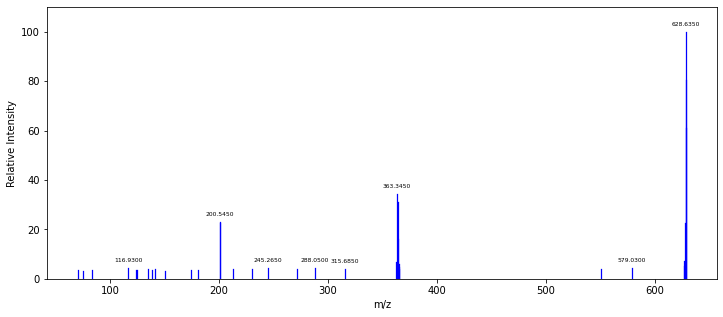

In [5]:
generate_spectra_plot(compound=compound)

This is a histogram plot of the retention index of all the members making up this compound. Please be aware that due to settings the range will never exceed these boundaeries

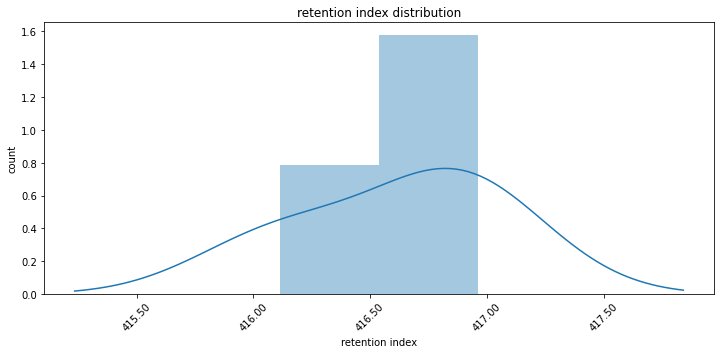

In [6]:
generate_histogram_ri(members)

This is a histogram plot of the accurate mass of all the members making up this compound. Please be aware that due to settings the range will never exceed these boundaeries

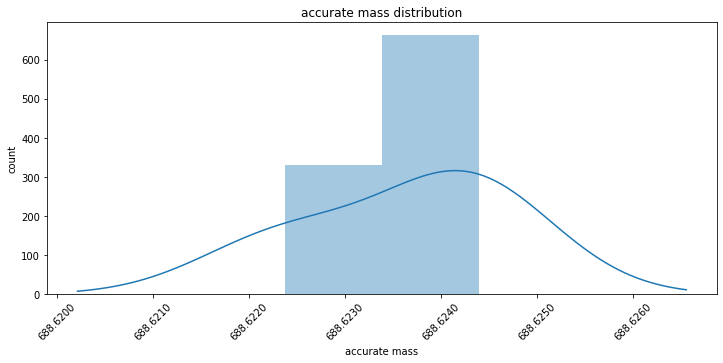

In [7]:
generate_histogram_accurate_mass(members)

This is a histogram plot of the basepeak intensity of all the members making up this compound. There are no related settings which affect this, except for
for a required min intensity setting for the Pre Cursor Mass.

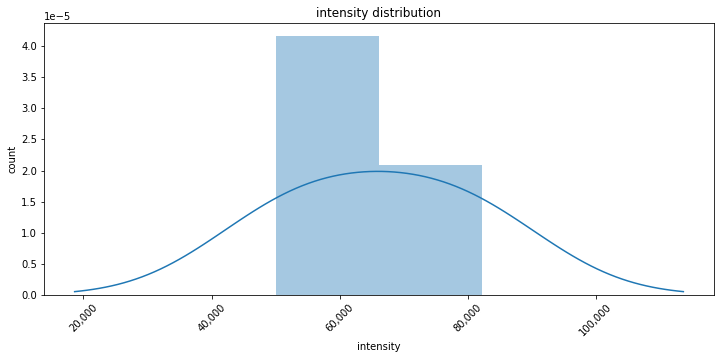

In [8]:
generate_histogram_intensity(members)

This plot demonstrates a similarity plot of all spectra making up this compond against each other. The purpose is mostly for diagnostics and finetuning of settings as well as discovering possible outliers.

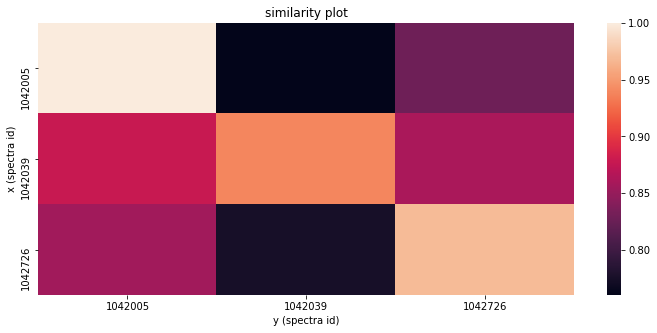

,x (spectra id),y (spectra id),score
0,1042039,1042039,0.940000
1,1042039,1042005,0.878300
2,1042039,1042726,0.860627
3,1042005,1042039,0.760510
4,1042005,1042005,1.000000
5,1042005,1042726,0.828164
6,1042726,1042039,0.775305
7,1042726,1042005,0.856511
8,1042726,1042726,0.970000


In [9]:
generate_similarity_plot(members)

This is a tabular representation of all members of this compound, with their most important properties.

In [10]:
to_dataframe(members).drop(['accurate_mass','spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)

,id,matrix,retention_index,sample,precursor_mass
0,1042039,,416.794737,NIH_Lip_Std_CSH_NEG_Liver_01,688.624390
1,1042005,,416.115021,NIH_Lip_Std_CSH_NEG_Heart_01,688.624146
2,1042726,,416.960697,consensus spectrum from 1 samples,688.622375


1042039


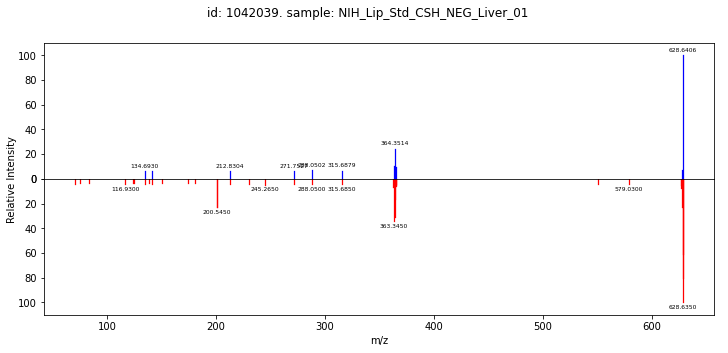

1042005


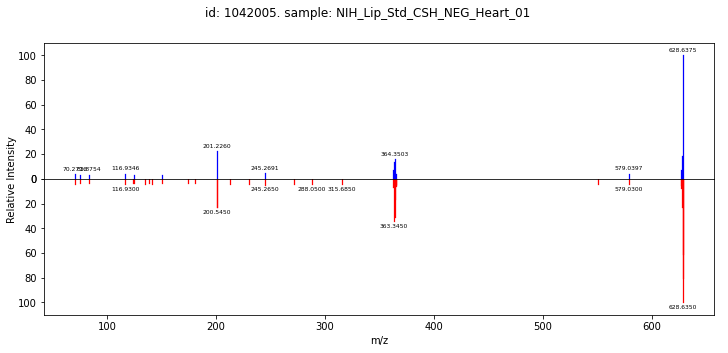

1042726


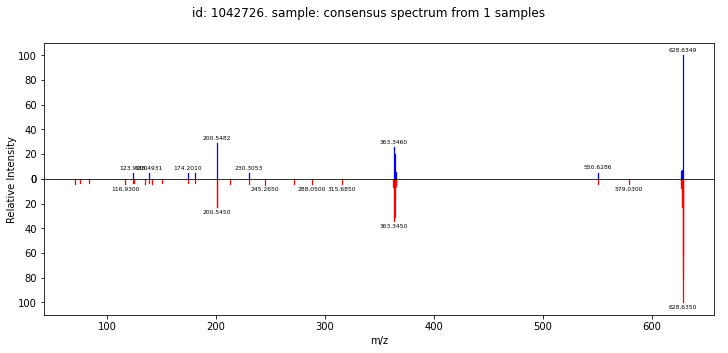

In [11]:

for member in members:


    print(member['id'])
    generate_head_tail_plot(compound=compound,member=member,figsize=(12,5))

This is an overview of the similarity distribution of all members for this compoaund against the consensus spectra. The consensus spectra includes all if it's members in it!

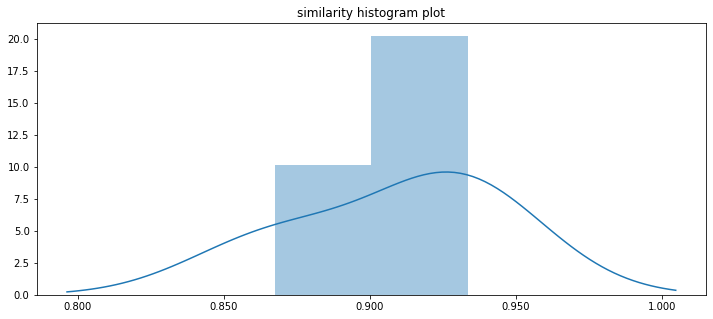

In [12]:
generate_similarity_histogram(compound,members)

Below here you can find a quick similarity search of potential identifications of this particular compound.

In [13]:
result = identify_compound(compound)
df = pd.DataFrame(result)

if 'spectrum' in df.columns:
    df = df.drop(['spectrum'],axis=1)
else:
    print("sorry no similarity hits found!")

In [14]:
df

,name,id,inchi_key,splash,score
0,Cer-AS d40:5,LipidBlast172952,GXESQJMFHWECBC-LHLRNGHBSA-N,splash10-004i-0052019000-11c66ae227dd76c463a1,0.804489
1,Cer-AS d40:5,LipidBlast171316,QZGMYGZTIJFAGJ-KUAJOKRASA-N,splash10-004i-0122119000-faa9fd7c804ce1f14608,0.804489
2,Cer-AS d40:5,LipidBlast172134,GYDRNXUGBLMALE-LNENFZHFSA-N,splash10-004i-0043019000-a00eea451cac189508cb,0.804489
3,Cer-AS d40:5,LipidBlast172543,JRGQKQCVLJKGIQ-AONCGLILSA-N,splash10-004i-0034019000-dcf45143aa1ff934cf84,0.804489
4,Cer-AS d40:5,LipidBlast173362,JIPJVNMYFDJTIP-ZNBCAIPPSA-N,splash10-004i-0034019000-5789857758030193303d,0.804489
5,Cer-AS d40:5,LipidBlast171725,VGAOLLUGWVXJIW-YQOACCCISA-N,splash10-004i-0043019000-6ff616d41ffe3552385f,0.804489


In [15]:
df

,name,id,inchi_key,splash,score
0,Cer-AS d40:5,LipidBlast172952,GXESQJMFHWECBC-LHLRNGHBSA-N,splash10-004i-0052019000-11c66ae227dd76c463a1,0.804489
1,Cer-AS d40:5,LipidBlast171316,QZGMYGZTIJFAGJ-KUAJOKRASA-N,splash10-004i-0122119000-faa9fd7c804ce1f14608,0.804489
2,Cer-AS d40:5,LipidBlast172134,GYDRNXUGBLMALE-LNENFZHFSA-N,splash10-004i-0043019000-a00eea451cac189508cb,0.804489
3,Cer-AS d40:5,LipidBlast172543,JRGQKQCVLJKGIQ-AONCGLILSA-N,splash10-004i-0034019000-dcf45143aa1ff934cf84,0.804489
4,Cer-AS d40:5,LipidBlast173362,JIPJVNMYFDJTIP-ZNBCAIPPSA-N,splash10-004i-0034019000-5789857758030193303d,0.804489
5,Cer-AS d40:5,LipidBlast171725,VGAOLLUGWVXJIW-YQOACCCISA-N,splash10-004i-0043019000-6ff616d41ffe3552385f,0.804489


In [16]:
df

,name,id,inchi_key,splash,score
0,Cer-AS d40:5,LipidBlast172952,GXESQJMFHWECBC-LHLRNGHBSA-N,splash10-004i-0052019000-11c66ae227dd76c463a1,0.804489
1,Cer-AS d40:5,LipidBlast171316,QZGMYGZTIJFAGJ-KUAJOKRASA-N,splash10-004i-0122119000-faa9fd7c804ce1f14608,0.804489
2,Cer-AS d40:5,LipidBlast172134,GYDRNXUGBLMALE-LNENFZHFSA-N,splash10-004i-0043019000-a00eea451cac189508cb,0.804489
3,Cer-AS d40:5,LipidBlast172543,JRGQKQCVLJKGIQ-AONCGLILSA-N,splash10-004i-0034019000-dcf45143aa1ff934cf84,0.804489
4,Cer-AS d40:5,LipidBlast173362,JIPJVNMYFDJTIP-ZNBCAIPPSA-N,splash10-004i-0034019000-5789857758030193303d,0.804489
5,Cer-AS d40:5,LipidBlast171725,VGAOLLUGWVXJIW-YQOACCCISA-N,splash10-004i-0043019000-6ff616d41ffe3552385f,0.804489


In [17]:
df

,name,id,inchi_key,splash,score
0,Cer-AS d40:5,LipidBlast172952,GXESQJMFHWECBC-LHLRNGHBSA-N,splash10-004i-0052019000-11c66ae227dd76c463a1,0.804489
1,Cer-AS d40:5,LipidBlast171316,QZGMYGZTIJFAGJ-KUAJOKRASA-N,splash10-004i-0122119000-faa9fd7c804ce1f14608,0.804489
2,Cer-AS d40:5,LipidBlast172134,GYDRNXUGBLMALE-LNENFZHFSA-N,splash10-004i-0043019000-a00eea451cac189508cb,0.804489
3,Cer-AS d40:5,LipidBlast172543,JRGQKQCVLJKGIQ-AONCGLILSA-N,splash10-004i-0034019000-dcf45143aa1ff934cf84,0.804489
4,Cer-AS d40:5,LipidBlast173362,JIPJVNMYFDJTIP-ZNBCAIPPSA-N,splash10-004i-0034019000-5789857758030193303d,0.804489
5,Cer-AS d40:5,LipidBlast171725,VGAOLLUGWVXJIW-YQOACCCISA-N,splash10-004i-0043019000-6ff616d41ffe3552385f,0.804489


In [18]:
df

,name,id,inchi_key,splash,score
0,Cer-AS d40:5,LipidBlast172952,GXESQJMFHWECBC-LHLRNGHBSA-N,splash10-004i-0052019000-11c66ae227dd76c463a1,0.804489
1,Cer-AS d40:5,LipidBlast171316,QZGMYGZTIJFAGJ-KUAJOKRASA-N,splash10-004i-0122119000-faa9fd7c804ce1f14608,0.804489
2,Cer-AS d40:5,LipidBlast172134,GYDRNXUGBLMALE-LNENFZHFSA-N,splash10-004i-0043019000-a00eea451cac189508cb,0.804489
3,Cer-AS d40:5,LipidBlast172543,JRGQKQCVLJKGIQ-AONCGLILSA-N,splash10-004i-0034019000-dcf45143aa1ff934cf84,0.804489
4,Cer-AS d40:5,LipidBlast173362,JIPJVNMYFDJTIP-ZNBCAIPPSA-N,splash10-004i-0034019000-5789857758030193303d,0.804489
5,Cer-AS d40:5,LipidBlast171725,VGAOLLUGWVXJIW-YQOACCCISA-N,splash10-004i-0043019000-6ff616d41ffe3552385f,0.804489
